In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns


# Full File Import
# df = pd.read_csv('./terrorism_new.csv',dtype={"approxdate": str})
# df.head()

# Truncated File Import
df = pd.read_csv('./truncated_terrorism_new.csv')
df.head()


# To export to a smaller CSV for Github Repo
# exportDf = df[['eventid','country_txt', 'targtype1','targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'region_txt','gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3']]
# exportDf.to_csv('truncated_terrorism_new.csv')

/Users/vincent/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,eventid,country_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,region_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3
0,0,197000000001,Dominican Republic,14,Private Citizens & Property,68.0,Named Civilian,Central America & Caribbean,MANO-D,NaN,NaN,NaN,NaN,NaN
1,1,197000000002,Mexico,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",North America,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN
2,2,197001000001,Philippines,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Southeast Asia,Unknown,NaN,NaN,NaN,NaN,NaN
3,3,197001000002,Greece,7,Government (Diplomatic),46.0,Embassy/Consulate,Western Europe,Unknown,NaN,NaN,NaN,NaN,NaN
4,4,197001000003,Japan,7,Government (Diplomatic),46.0,Embassy/Consulate,East Asia,Unknown,NaN,NaN,NaN,NaN,NaN


In [3]:
# ===================== Identifying which COUNTRIES have the highest terrorism incidents ===================== 

sortedCountries = df.groupby('country_txt').count()
sortedCountries = sortedCountries[['eventid']] 
sortedCountries.rename(columns={'eventid' : 'incident_count'}, inplace=True)
sortedCountries.sort_values('incident_count', ascending = False, inplace = True)
print('')
print('TERRORISM INCIDENTS BY COUNTRY')
sortedCountries


TERRORISM INCIDENTS BY COUNTRY


,incident_count
country_txt,
Iraq,26057
Pakistan,14847
Afghanistan,14509
India,12853
Colombia,8515
Philippines,7509
Peru,6108
United Kingdom,5335
El Salvador,5320


In [4]:
# ===================== Identifying which REGIONS have the highest terrorism incidents ===================== 

sortedRegions = df.groupby('region_txt').count()
sortedRegions = sortedRegions[['eventid']] 
sortedRegions.rename(columns={'eventid' : 'incident_count'}, inplace=True)
sortedRegions.sort_values('incident_count', ascending = False, inplace = True)
print('')
print('TERRORISM INCIDENTS BY REGION')
sortedRegions



TERRORISM INCIDENTS BY REGION


,incident_count
region_txt,
Middle East & North Africa,53110
South Asia,48266
Sub-Saharan Africa,19752
South America,19292
Western Europe,16843
Southeast Asia,13363
Central America & Caribbean,10359
Eastern Europe,5217
North America,3579


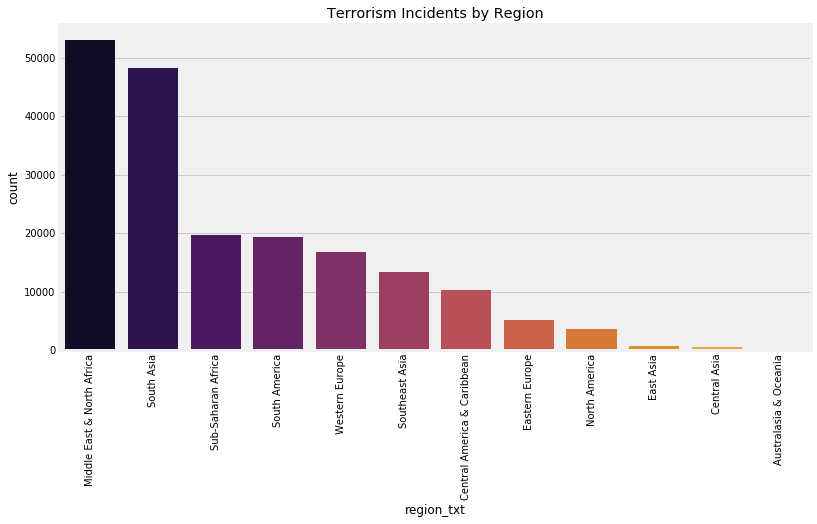

In [5]:
# GRAPH: Identifying which REGIONS have the highest terrorism incidents

plt.subplots(figsize=(12,6))
sns.countplot('region_txt', data=df, palette ='inferno', order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Incidents by Region')
plt.show()

In [6]:
# ===================== Incident Targets - ALL terrorist groups and ALL world regions ===================== 

target = df.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - WHOLE WORLD')
target


TERRORISM TARGETS - WHOLE WORLD


,incident_count
targtype1_txt,
Private Citizens & Property,46283
Military,29978
Police,26023
Government (General),22274
Business,21277
Transportation,6929
Unknown,6449
Utilities,6158
Religious Figures/Institutions,4693


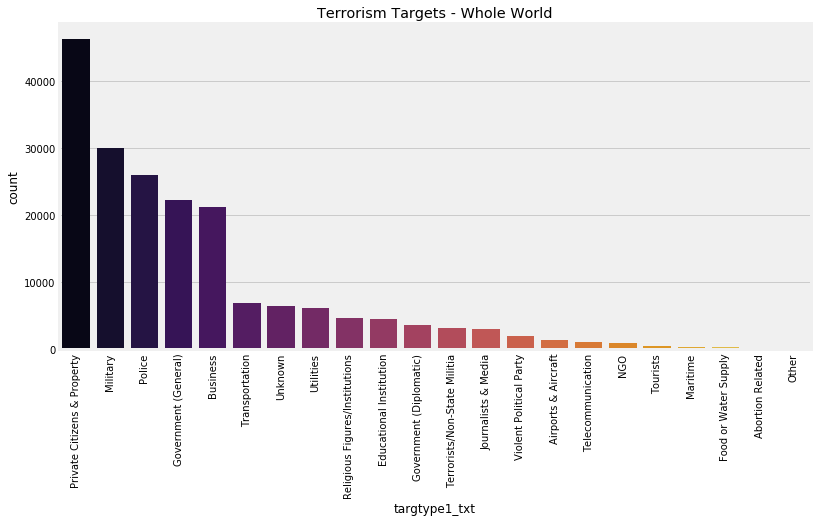

In [7]:
# GRAPH: Incident Targets - ALL terrorist groups and ALL world regions

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=df, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - Whole World')
plt.show()

In [8]:
# ===================== Incident Targets - Middle East & North Africa, all Terrorist Groups ===================== 

regionString = 'Middle East & North Africa'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Middle East & North Africa


,incident_count
targtype1_txt,
Private Citizens & Property,16182
Military,9866
Police,7128
Government (General),4411
Business,4323
Unknown,2353
Terrorists/Non-State Militia,1777
Religious Figures/Institutions,1316
Transportation,1212


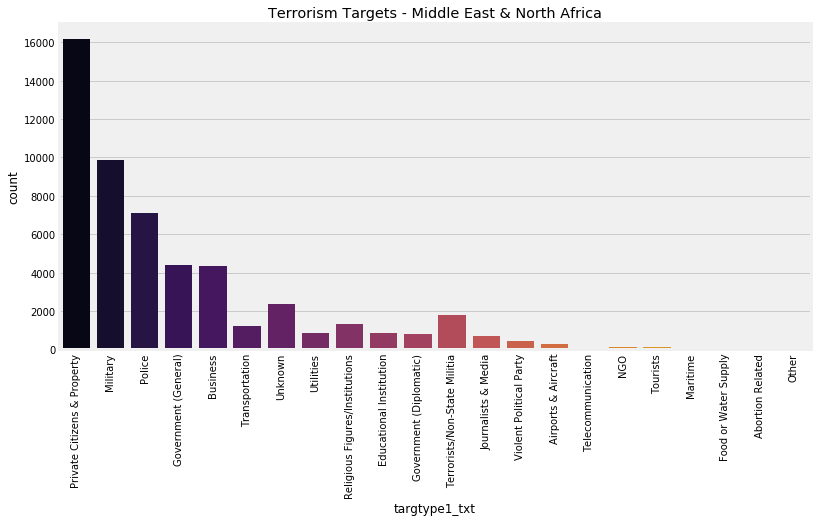

In [9]:
# GRAPH: Incident Targets - Middle East & North Africa, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [10]:
# ===================== Incident Targets - South Asia, all Terrorist Groups ===================== 

regionString = 'South Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - South Asia


,incident_count
targtype1_txt,
Private Citizens & Property,11099
Police,9412
Military,6289
Government (General),5809
Business,3297
Unknown,2645
Transportation,2162
Educational Institution,1852
Religious Figures/Institutions,1191


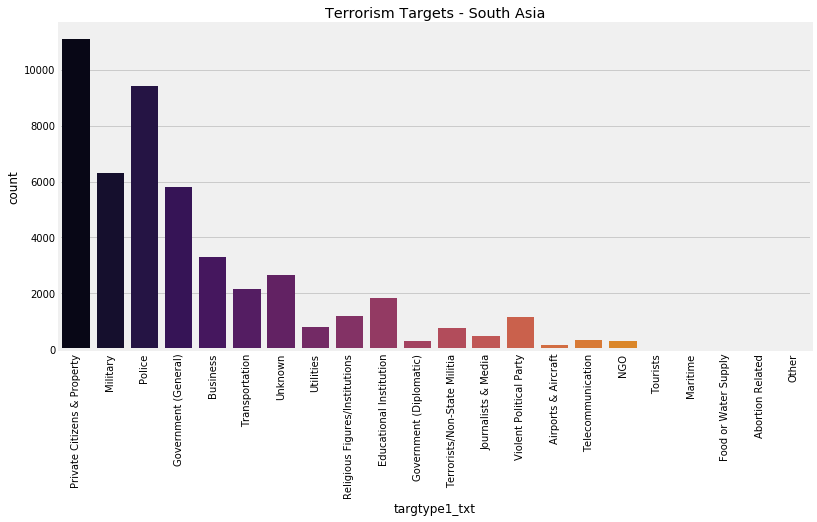

In [11]:
# GRAPH: Incident Targets - South Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [12]:
# ===================== Incident Targets - Sub-Saharan Africa, all Terrorist Groups ===================== 

regionString = 'Sub-Saharan Africa'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Sub-Saharan Africa


,incident_count
targtype1_txt,
Private Citizens & Property,6584
Military,3552
Government (General),2304
Police,1651
Business,1325
Government (Diplomatic),705
Transportation,600
Religious Figures/Institutions,599
Utilities,476


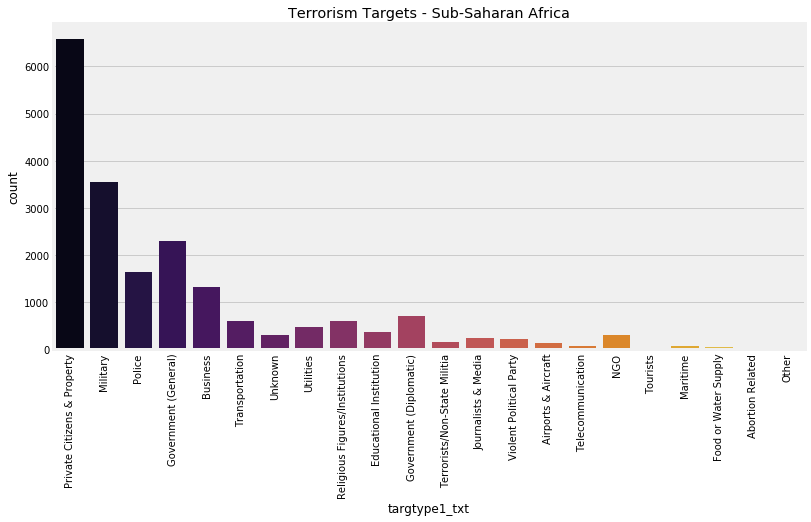

In [13]:
# GRAPH: Incident Targets - Sub-Saharan Africa, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [14]:
# ===================== Incident Targets - South America, all Terrorist Groups ===================== 

regionString = 'South America'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - South America


,incident_count
targtype1_txt,
Business,3531
Private Citizens & Property,3222
Government (General),2874
Police,2294
Utilities,1963
Military,1823
Transportation,1099
Journalists & Media,588
Government (Diplomatic),391


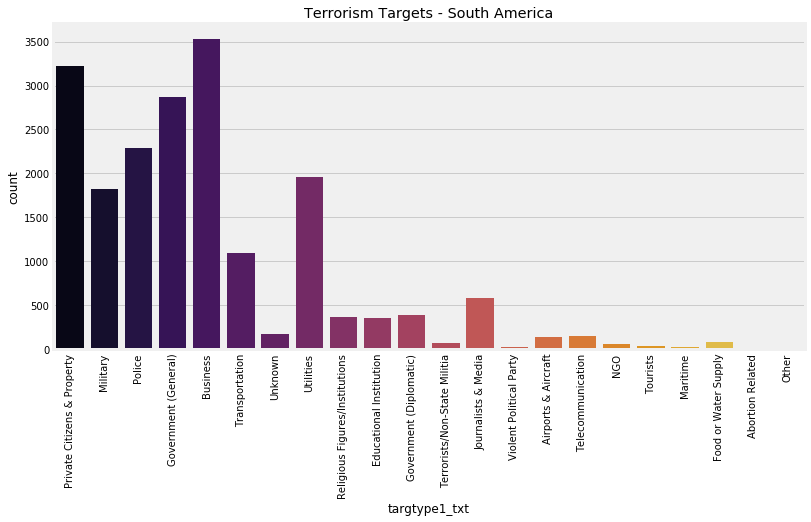

In [15]:
# GRAPH: Incident Targets - South America, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [16]:
# ===================== Incident Targets - Western Europe, all Terrorist Groups ===================== 

regionString = 'Western Europe'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Western Europe


,incident_count
targtype1_txt,
Business,4231
Private Citizens & Property,3439
Government (General),2171
Police,2161
Military,1384
Government (Diplomatic),681
Transportation,454
Unknown,386
Religious Figures/Institutions,333


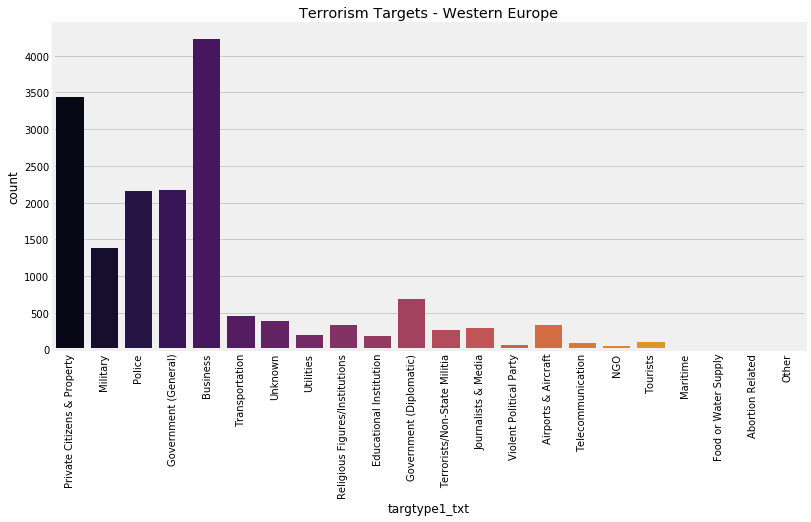

In [17]:
# GRAPH: Incident Targets - Western Europe, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [18]:
# ===================== Incident Targets - Southeast Asia, all Terrorist Groups ===================== 

regionString = 'Southeast Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Southeast Asia


,incident_count
targtype1_txt,
Private Citizens & Property,2650
Military,2501
Government (General),2145
Business,1811
Police,1454
Transportation,470
Educational Institution,421
Utilities,401
Religious Figures/Institutions,357


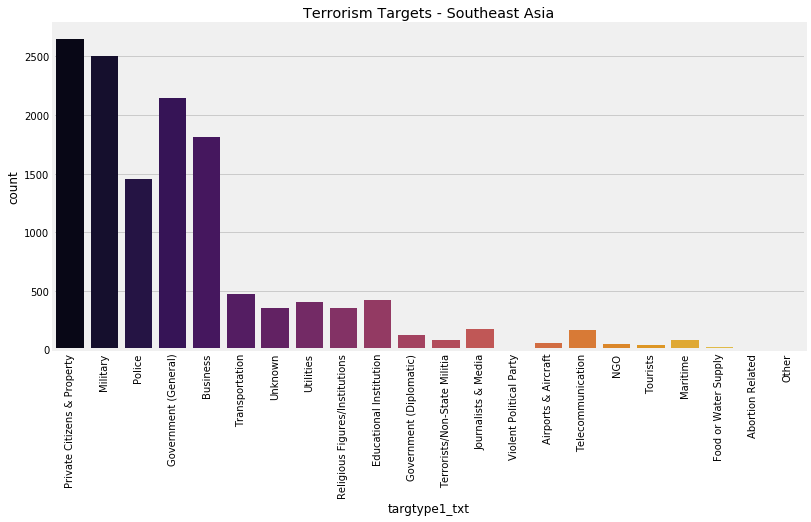

In [19]:
# GRAPH: Incident Targets - Southeast Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [20]:
# ===================== Incident Targets - Central America & Caribbean, all Terrorist Groups ===================== 

regionString = 'Central America & Caribbean'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Central America & Caribbean


,incident_count
targtype1_txt,
Military,3065
Private Citizens & Property,1503
Utilities,1227
Business,1193
Government (General),1114
Police,590
Transportation,406
Journalists & Media,274
Government (Diplomatic),220


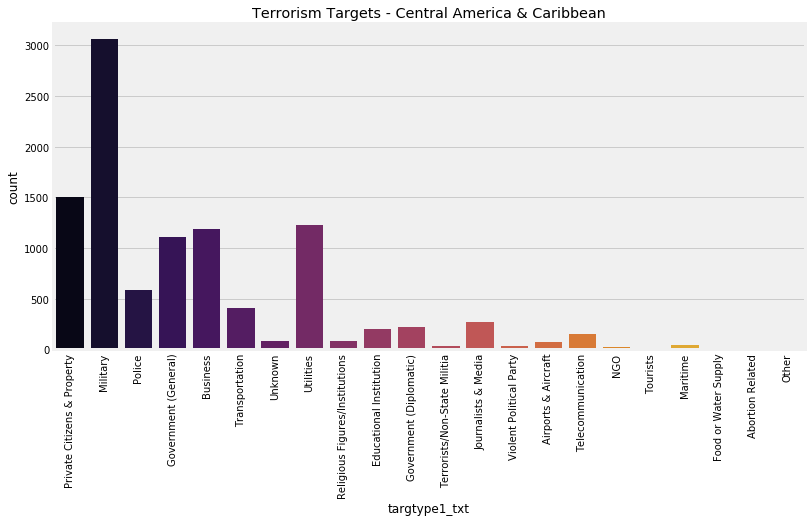

In [21]:
# GRAPH: Incident Targets - Central America & Caribbean, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [22]:
# ===================== Incident Targets - Eastern Europe, all Terrorist Groups ===================== 

regionString = 'Eastern Europe'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Eastern Europe


,incident_count
targtype1_txt,
Military,1139
Private Citizens & Property,888
Police,884
Government (General),704
Business,437
Transportation,295
Religious Figures/Institutions,182
Government (Diplomatic),138
Journalists & Media,138


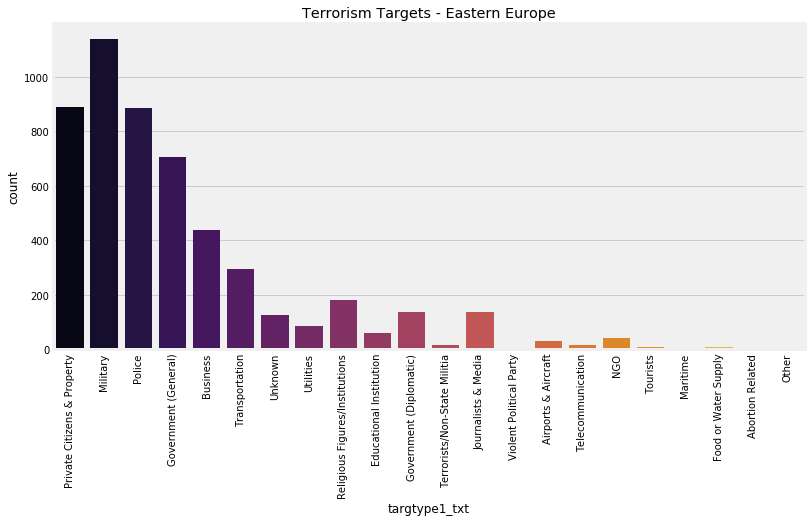

In [23]:
# GRAPH: Incident Targets - Eastern Europe, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [24]:
# ===================== Incident Targets - North America, all Terrorist Groups =====================

regionString = 'North America'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - North America


,incident_count
targtype1_txt,
Business,927
Private Citizens & Property,498
Government (General),433
Abortion Related,260
Police,240
Military,212
Religious Figures/Institutions,192
Educational Institution,184
Government (Diplomatic),184


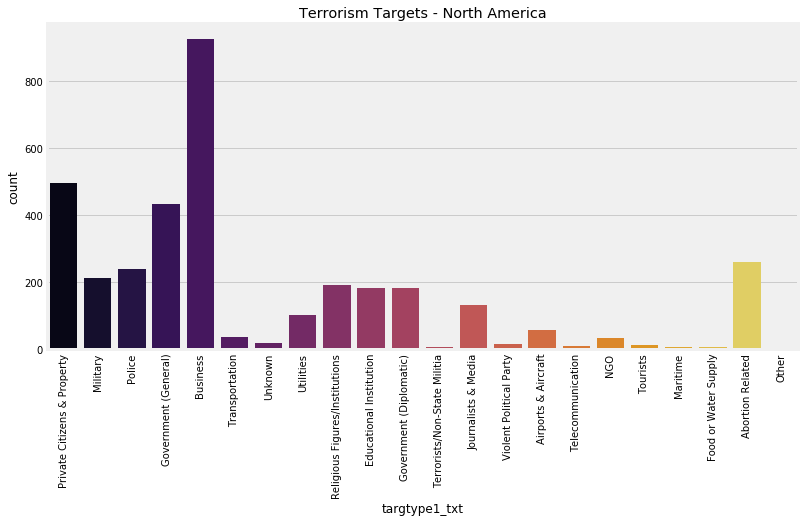

In [25]:
# GRAPH: Incident Targets - North America, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [26]:
# ===================== Incident Targets - East Asia, all Terrorist Groups ====================

regionString = 'East Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - East Asia


,incident_count
targtype1_txt,
Transportation,148
Government (General),129
Business,102
Private Citizens & Property,100
Police,98
Airports & Aircraft,59
Military,41
Government (Diplomatic),35
Religious Figures/Institutions,32


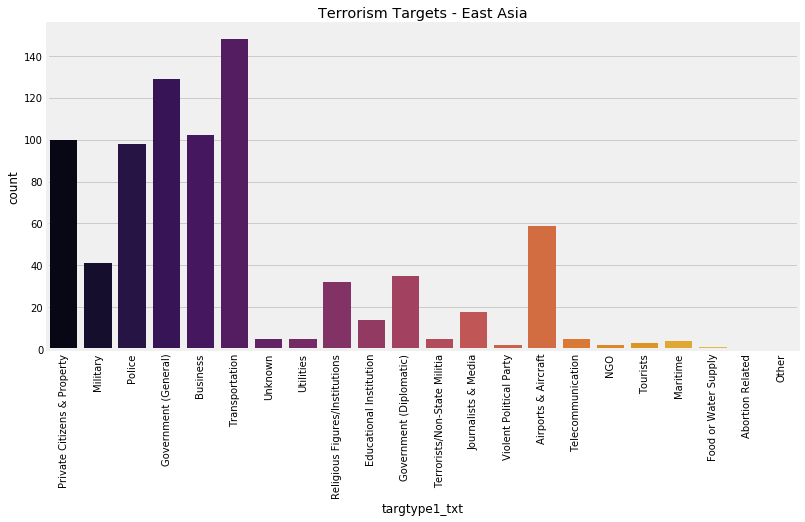

In [27]:
# GRAPH: Incident Targets - East Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [28]:
# ===================== Incident Targets - Central Asia, all Terrorist Groups ====================

regionString = 'Central Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Central Asia


,incident_count
targtype1_txt,
Government (General),128
Military,91
Private Citizens & Property,80
Police,79
Transportation,35
Business,35
Government (Diplomatic),33
Journalists & Media,21
NGO,10


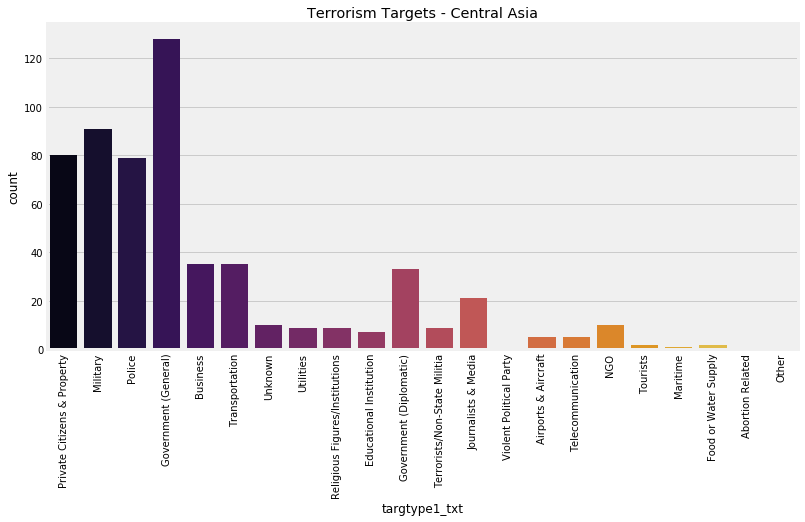

In [29]:
# GRAPH: Incident Targets - Central Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [30]:
# ===================== Incident Targets - Australasia & Oceania, all Terrorist Groups ====================

regionString = 'Australasia & Oceania'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Australasia & Oceania


,incident_count
targtype1_txt,
Business,65
Government (General),52
Private Citizens & Property,38
Police,32
Government (Diplomatic),30
Religious Figures/Institutions,29
Military,15
Transportation,10
Educational Institution,8


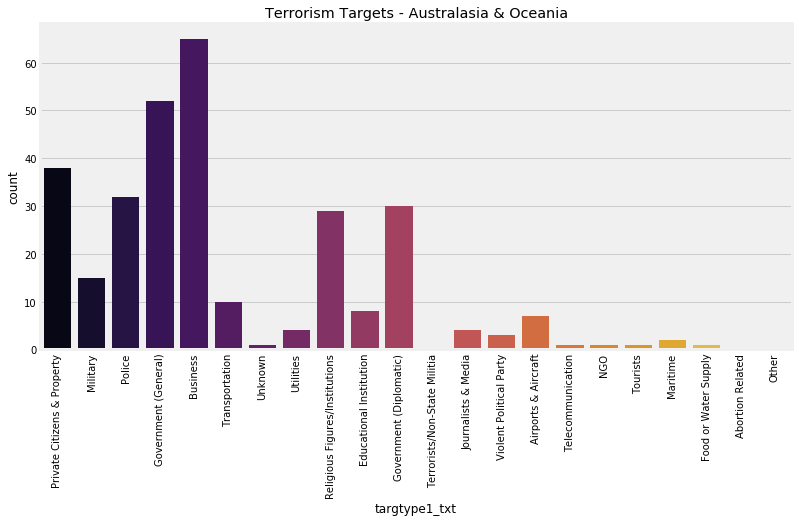

In [31]:
# GRAPH: Incident Targets - Australasia & Oceania, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [32]:
# ===================== All Labeled Terrorist Groups - Grouped to see their incident counts  ====================

target = df.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By Terrorist Group')
target


TERRORISM TARGETS - By Terrorist Group


,incident_count
gname,
Unknown,86261
Taliban,8727
Islamic State of Iraq and the Levant (ISIL),6385
Shining Path (SL),4562
Al-Shabaab,3774
Farabundo Marti National Liberation Front (FMLN),3351
New People's Army (NPA),3054
Irish Republican Army (IRA),2669
Boko Haram,2665


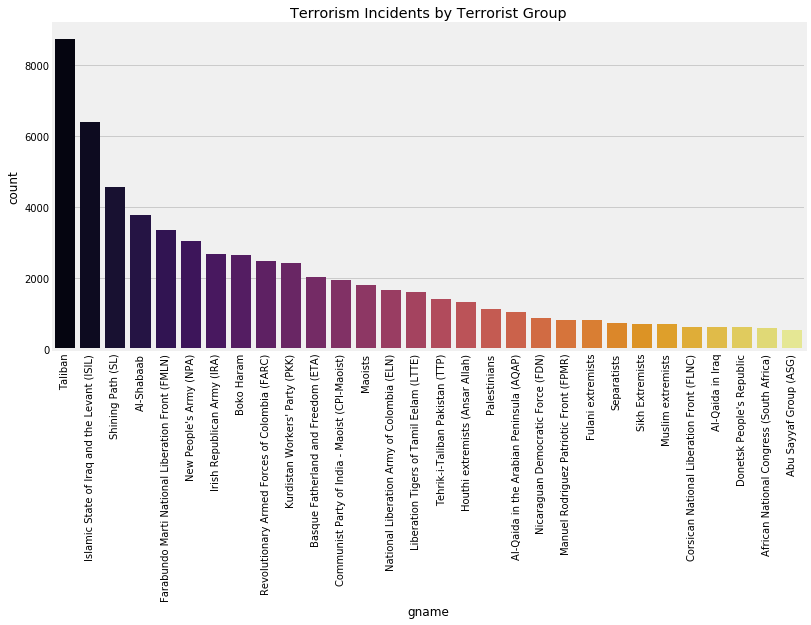

In [33]:
# GRAPH: All Labeled Terrorist Groups - Grouped to see their incident counts
# Includes: Top 30 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=df, palette ='inferno', order=df['gname'].value_counts().iloc[1:31].index)
plt.xticks(rotation=90)
plt.title('Terrorism Incidents by Terrorist Group')
plt.show()

In [34]:
# ===================== Incident Targets - For UNKNOWN Terrorist Groups ====================

terroristGroupString = 'Unknown'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Unknown


,incident_count
targtype1_txt,
Private Citizens & Property,21770
Government (General),11849
Police,10833
Military,9462
Business,9383
Unknown,4330
Transportation,3208
Religious Figures/Institutions,2654
Educational Institution,2533


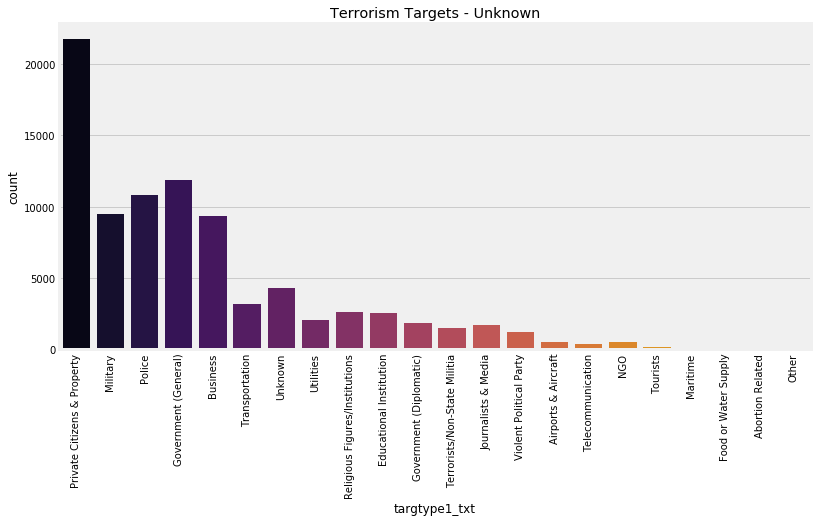

In [35]:
# GRAPH: Incident Targets - For UNKNOWN Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [36]:
# ===================== Incident Targets - For Taliban Terrorist Groups ====================

terroristGroupString = 'Taliban'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Taliban


,incident_count
targtype1_txt,
Police,3024
Military,1759
Private Citizens & Property,1573
Government (General),1043
Unknown,283
Business,251
Educational Institution,157
Terrorists/Non-State Militia,133
Transportation,113


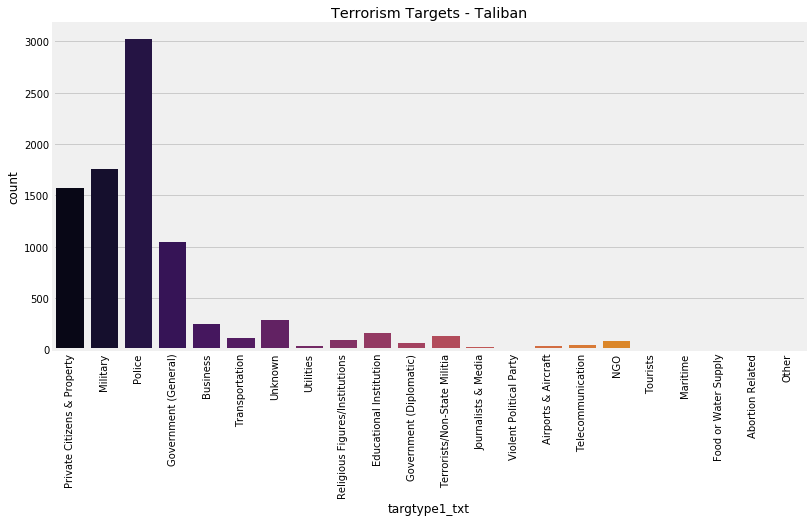

In [37]:
# GRAPH: Incident Targets - For Taliban Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [38]:
# ===================== Incident Targets - For Islamic State of Iraq and the Levant (ISIL) Terrorist Groups ====================

terroristGroupString = 'Islamic State of Iraq and the Levant (ISIL)'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Islamic State of Iraq and the Levant (ISIL)


,incident_count
targtype1_txt,
Private Citizens & Property,2533
Military,1657
Police,767
Business,285
Unknown,258
Terrorists/Non-State Militia,257
Government (General),186
Religious Figures/Institutions,128
Utilities,102


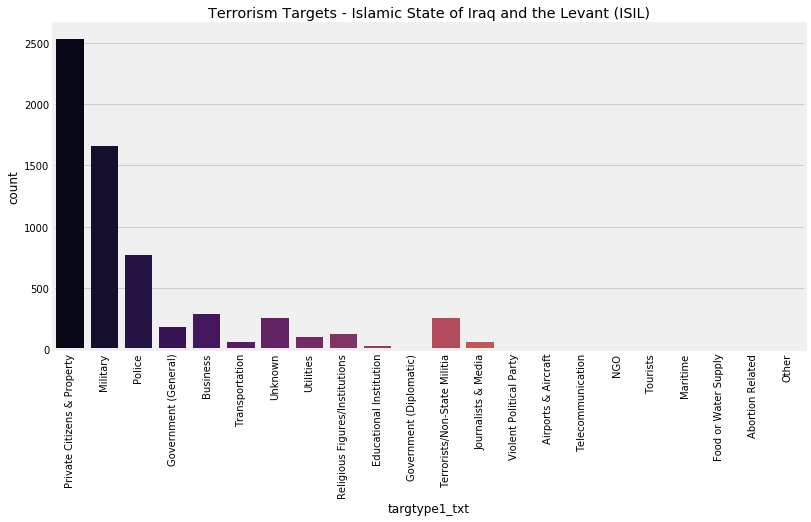

In [39]:
# GRAPH: Incident Targets - For Islamic State of Iraq and the Levant (ISIL) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [40]:
# ===================== Incident Targets - For Shining Path (SL) Terrorist Groups ====================

terroristGroupString = 'Shining Path (SL)'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Shining Path (SL)


,incident_count
targtype1_txt,
Private Citizens & Property,858
Business,739
Government (General),728
Police,615
Utilities,567
Military,434
Transportation,201
Educational Institution,111
Journalists & Media,69


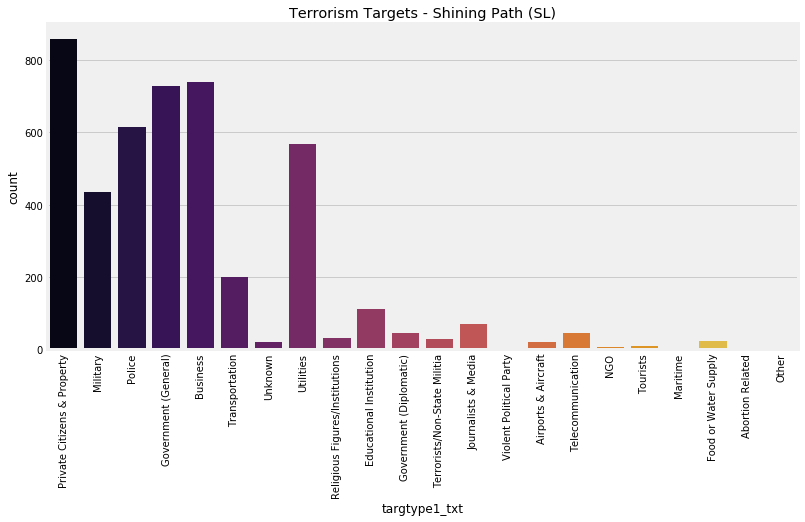

In [41]:
# GRAPH: Incident Targets - For Shining Path (SL) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [42]:
# ===================== Incident Targets - For Al-Shabaab Terrorist Groups ====================

terroristGroupString = 'Al-Shabaab'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Al-Shabaab


,incident_count
targtype1_txt,
Military,1671
Private Citizens & Property,667
Government (General),524
Police,294
Business,186
Unknown,64
Religious Figures/Institutions,51
Journalists & Media,48
NGO,43


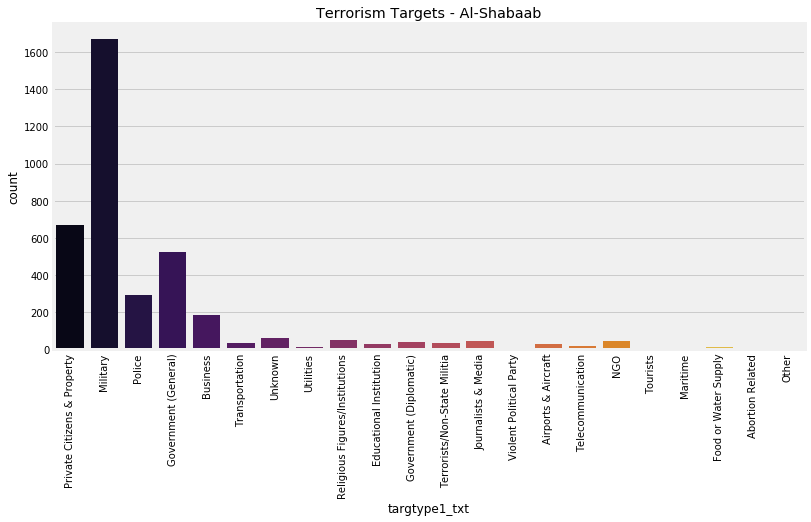

In [43]:
# GRAPH: Incident Targets - For Al-Shabaab Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [44]:
# ===================== Incident Targets - For Farabundo Marti National Liberation Front (FMLN) Terrorist Groups ====================

terroristGroupString = 'Farabundo Marti National Liberation Front (FMLN)'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Farabundo Marti National Liberation Front (FMLN)


,incident_count
targtype1_txt,
Military,1230
Utilities,923
Private Citizens & Property,367
Business,262
Government (General),149
Transportation,144
Police,123
Journalists & Media,53
Telecommunication,53


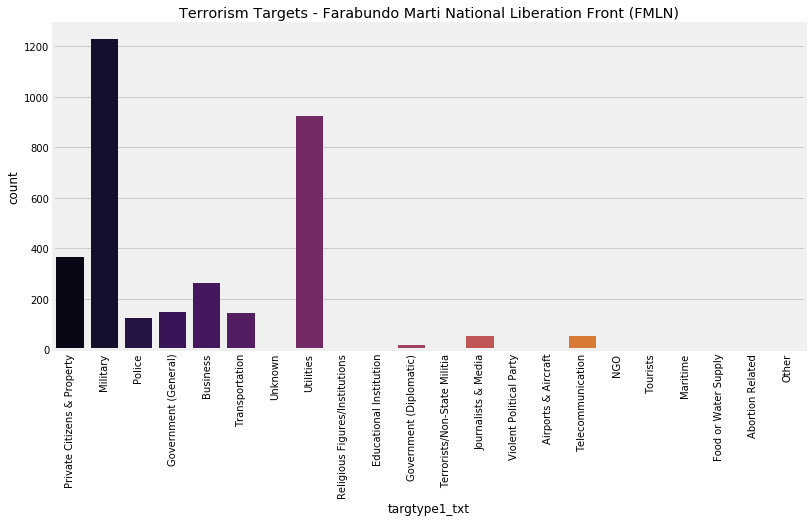

In [45]:
# GRAPH: Incident Targets - For Farabundo Marti National Liberation Front (FMLN) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [46]:
# ===================== Incident Targets - For New People's Army (NPA) Terrorist Groups ====================

terroristGroupString = "New People's Army (NPA)"

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By New People's Army (NPA)


,incident_count
targtype1_txt,
Military,1103
Business,456
Police,456
Private Citizens & Property,347
Government (General),341
Transportation,68
Utilities,62
Telecommunication,61
Unknown,58


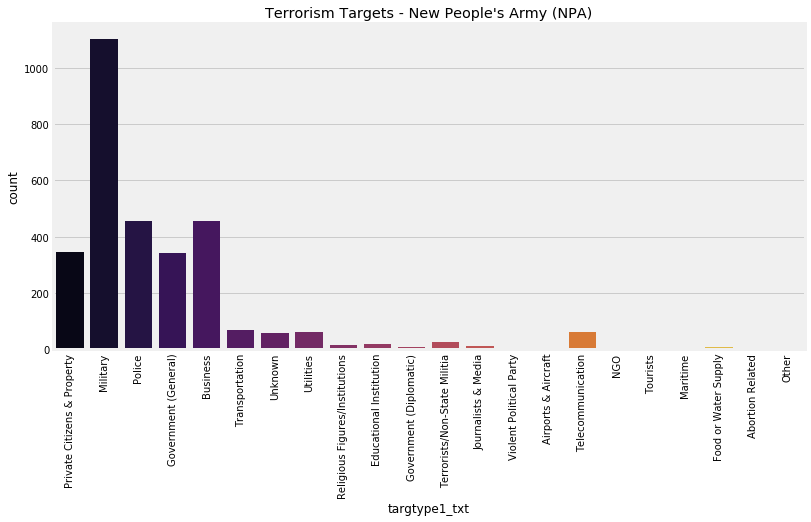

In [47]:
# GRAPH: Incident Targets - For New People's Army (NPA) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [48]:
# ===================== Incident Targets - For Irish Republican Army (IRA) Terrorist Groups ====================

terroristGroupString = "Irish Republican Army (IRA)"

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Irish Republican Army (IRA)


,incident_count
targtype1_txt,
Military,784
Police,533
Business,531
Private Citizens & Property,423
Government (General),157
Terrorists/Non-State Militia,78
Transportation,76
Unknown,38
Airports & Aircraft,12


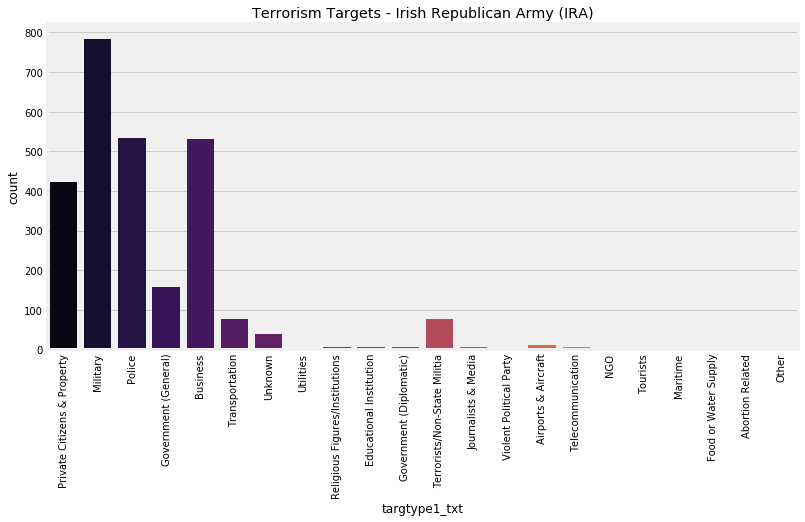

In [49]:
# GRAPH: Incident Targets - For Irish Republican Army (IRA) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [50]:
# ===================== Incident Targets - For Boko Haram Terrorist Groups ====================

terroristGroupString = "Boko Haram"

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Boko Haram


,incident_count
targtype1_txt,
Private Citizens & Property,1252
Military,405
Police,251
Religious Figures/Institutions,180
Government (General),144
Business,112
Educational Institution,90
Unknown,88
Transportation,45


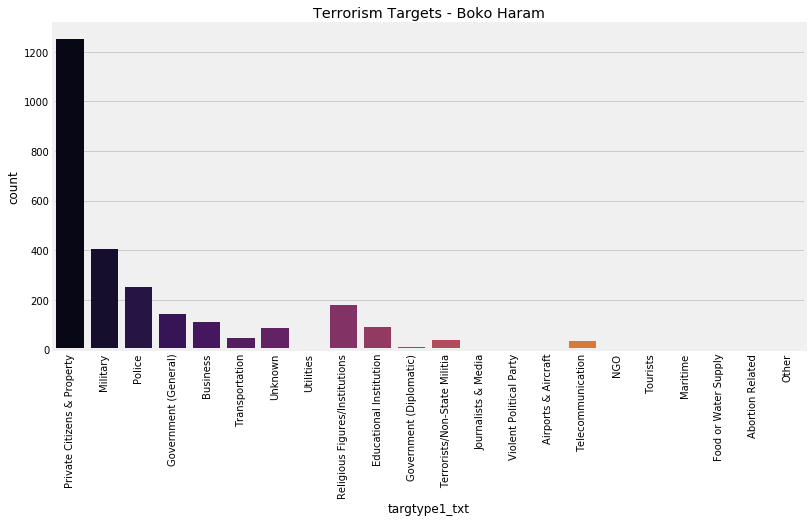

In [51]:
# GRAPH: Incident Targets - For Boko Haram Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [52]:
# ===================== Incident Targets - For Revolutionary Armed Forces of Colombia (FARC) Terrorist Groups ====================

terroristGroupString = "Revolutionary Armed Forces of Colombia (FARC)"

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Revolutionary Armed Forces of Colombia (FARC)


,incident_count
targtype1_txt,
Private Citizens & Property,505
Military,459
Police,412
Business,333
Utilities,234
Government (General),234
Transportation,152
Unknown,43
Religious Figures/Institutions,19


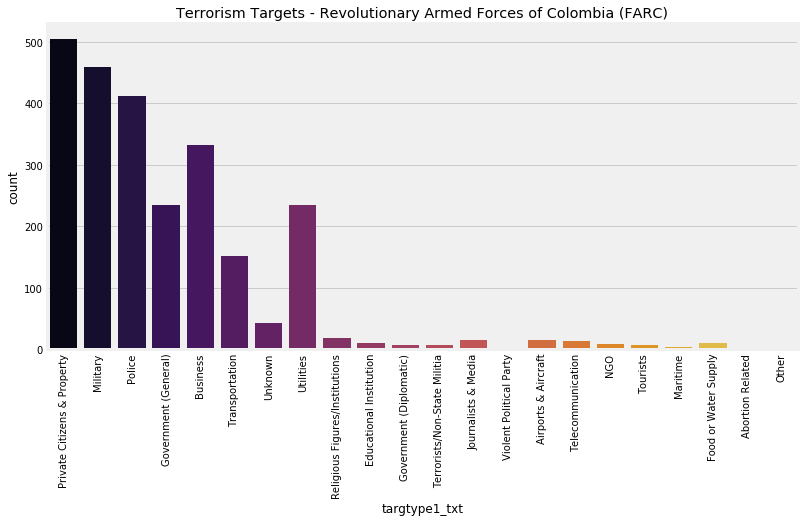

In [53]:
# GRAPH: Incident Targets - For Revolutionary Armed Forces of Colombia (FARC) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [54]:
# ===================== Incident Targets - For Kurdistan Workers' Party (PKK) Terrorist Groups ====================

terroristGroupString = "Kurdistan Workers' Party (PKK)"

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Kurdistan Workers' Party (PKK)


,incident_count
targtype1_txt,
Military,840
Police,417
Private Citizens & Property,371
Business,250
Government (General),121
Transportation,94
Educational Institution,89
Unknown,49
Terrorists/Non-State Militia,47


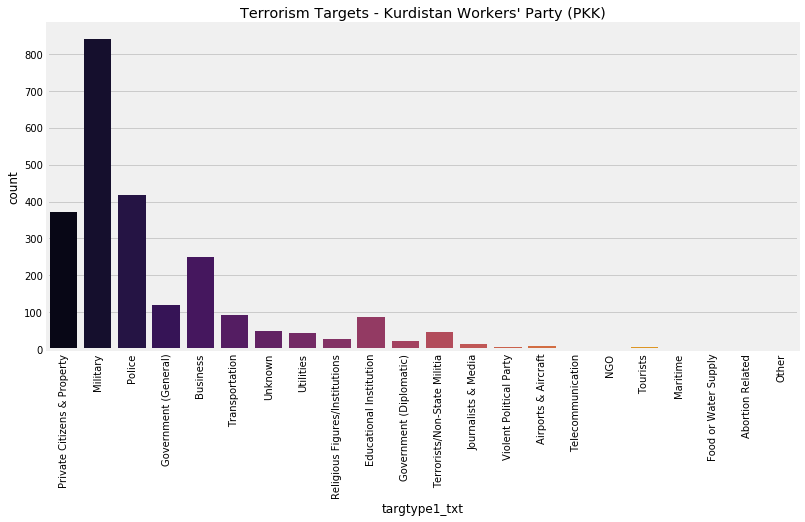

In [55]:
# GRAPH: Incident Targets - For Kurdistan Workers' Party (PKK) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [56]:
# ===================== Top Terrorist Groups for Middle East & North Africa Region ===================== 

regionString = 'Middle East & North Africa'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - Middle East & North Africa


,incident_count
gname,
Unknown,30475
Islamic State of Iraq and the Levant (ISIL),6327
Kurdistan Workers' Party (PKK),2250
Houthi extremists (Ansar Allah),1330
Palestinians,1105
Al-Qaida in the Arabian Peninsula (AQAP),1038
Al-Qaida in Iraq,637
Palestinian Extremists,505
Sinai Province of the Islamic State,476


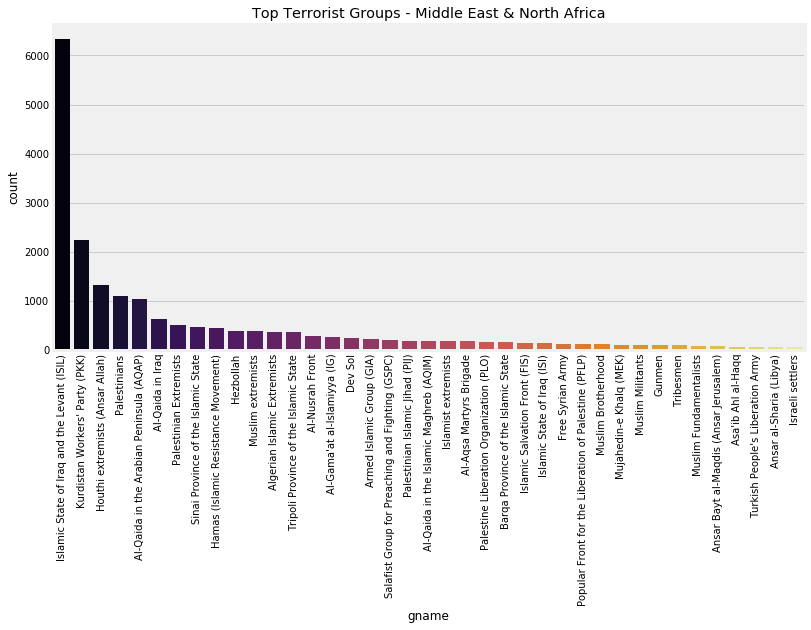

In [65]:
# GRAPH: Top Terrorist Groups for Middle East & North Africa Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

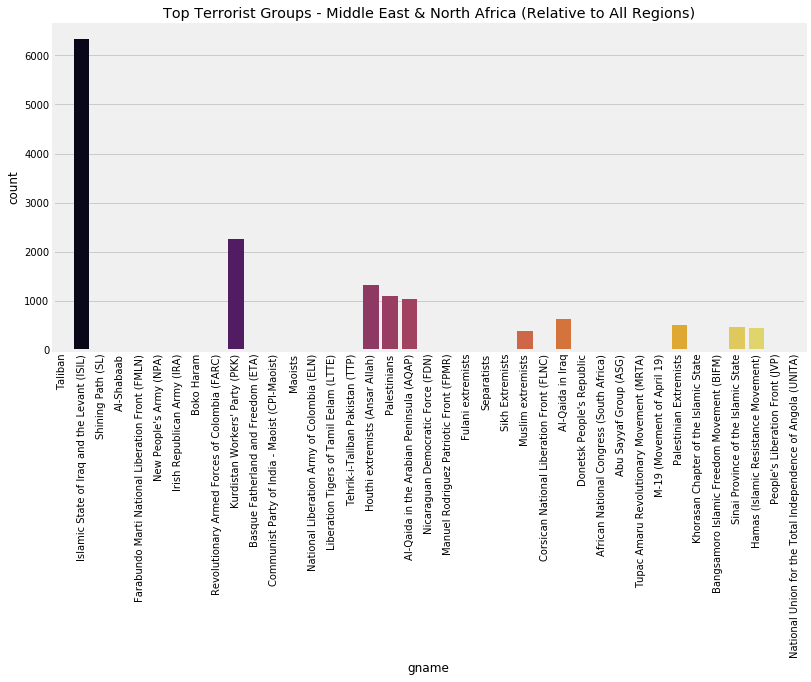

In [66]:
# GRAPH: Top Terrorist Groups for Middle East & North Africa Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [68]:
# ===================== Top Terrorist Groups for South Asia Region ===================== 

regionString = 'South Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - South Asia


,incident_count
gname,
Unknown,23082
Taliban,8725
Communist Party of India - Maoist (CPI-Maoist),1960
Maoists,1813
Liberation Tigers of Tamil Eelam (LTTE),1604
Tehrik-i-Taliban Pakistan (TTP),1425
Sikh Extremists,712
Khorasan Chapter of the Islamic State,488
People's Liberation Front (JVP),433


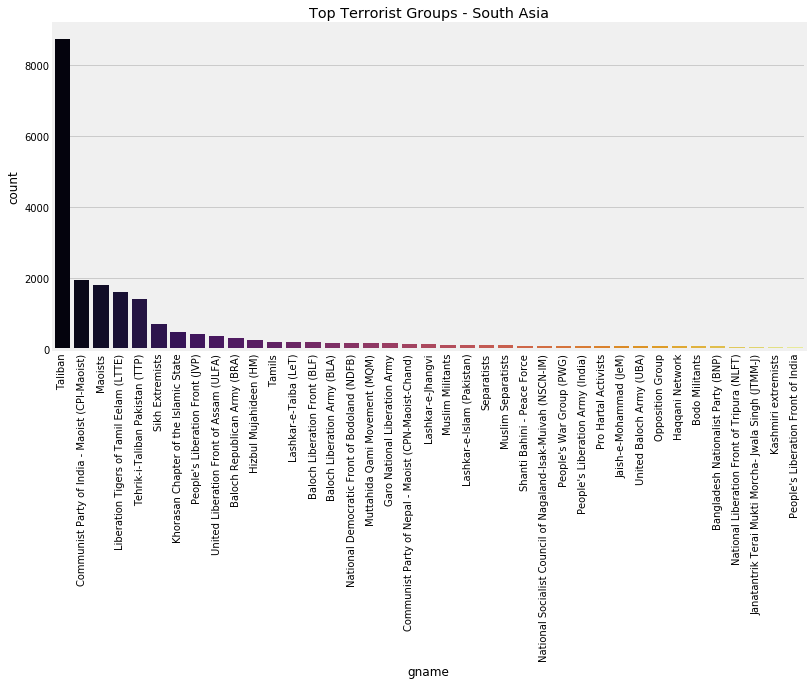

In [69]:
# GRAPH: Top Terrorist Groups for South Asia Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

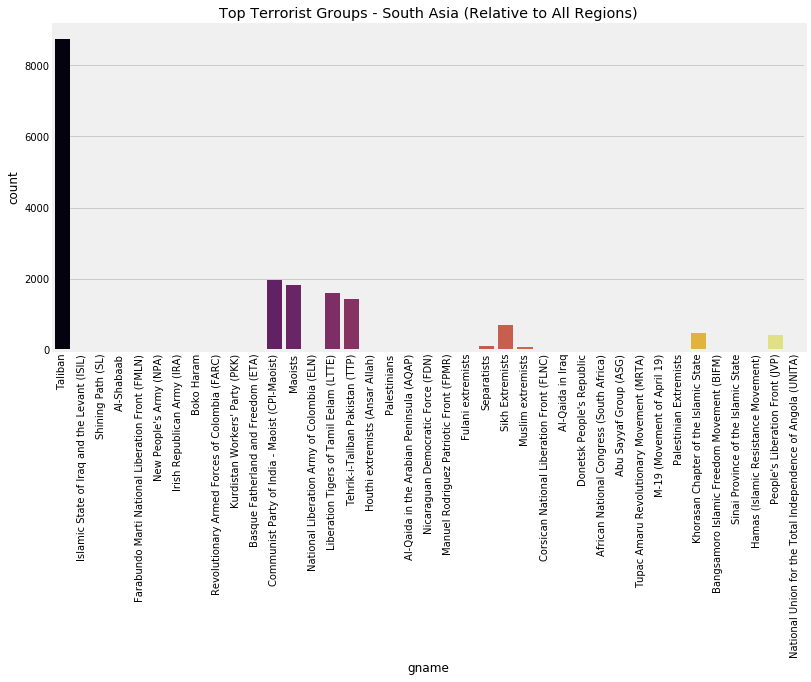

In [70]:
# GRAPH: Top Terrorist Groups for South Asia Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [71]:
# ===================== Top Terrorist Groups for Sub-Saharan Africa Region ===================== 

regionString = 'Sub-Saharan Africa'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - Sub-Saharan Africa


,incident_count
gname,
Unknown,6645
Al-Shabaab,3774
Boko Haram,2665
Fulani extremists,815
African National Congress (South Africa),606
National Union for the Total Independence of Angola (UNITA),432
Lord's Resistance Army (LRA),332
Mozambique National Resistance Movement (MNR),311
Allied Democratic Forces (ADF),264


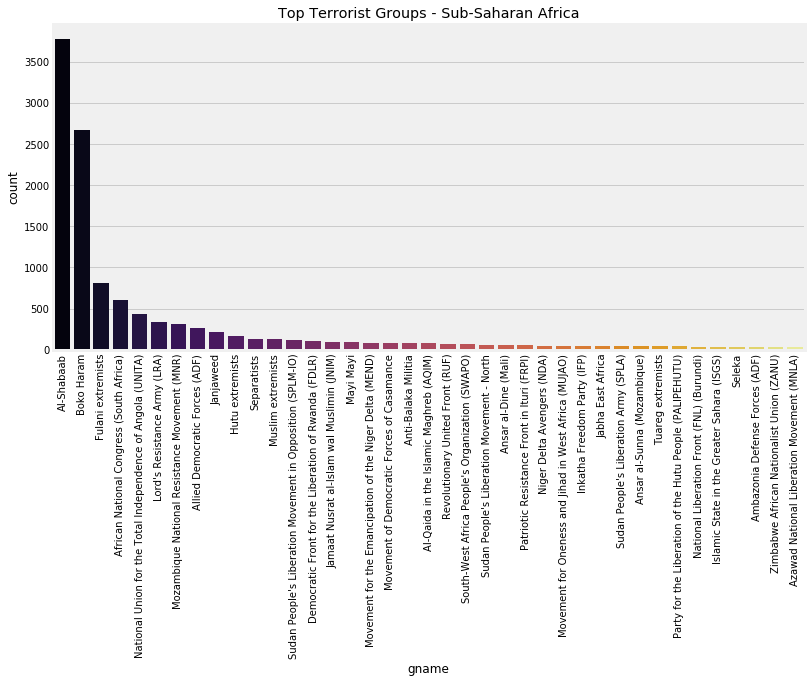

In [72]:
# GRAPH: Top Terrorist Groups for Sub-Saharan Africa Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

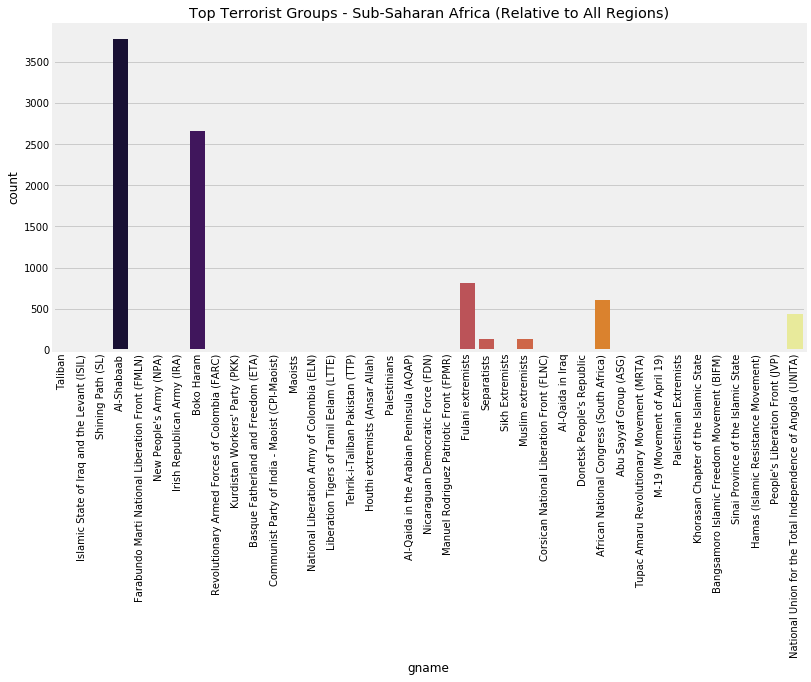

In [73]:
# GRAPH: Top Terrorist Groups for Sub-Saharan Africa Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [74]:
# ===================== Top Terrorist Groups for South America Region ===================== 

regionString = 'South America'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - South America


,incident_count
gname,
Unknown,5325
Shining Path (SL),4561
Revolutionary Armed Forces of Colombia (FARC),2487
National Liberation Army of Colombia (ELN),1683
Manuel Rodriguez Patriotic Front (FPMR),830
Tupac Amaru Revolutionary Movement (MRTA),557
M-19 (Movement of April 19),553
Narco-Terrorists,366
Movement of the Revolutionary Left (MIR) (Chile),305


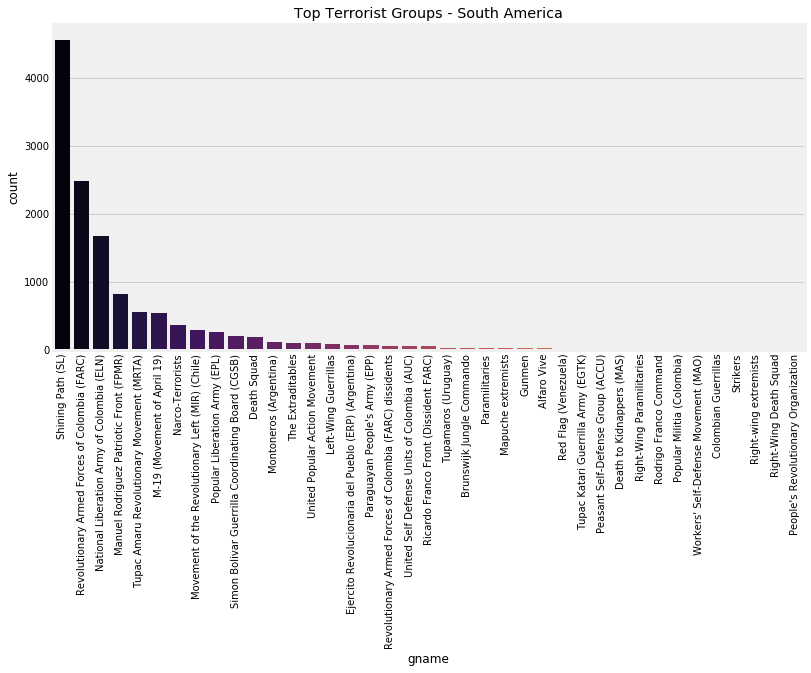

In [75]:
# GRAPH: Top Terrorist Groups for South America Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

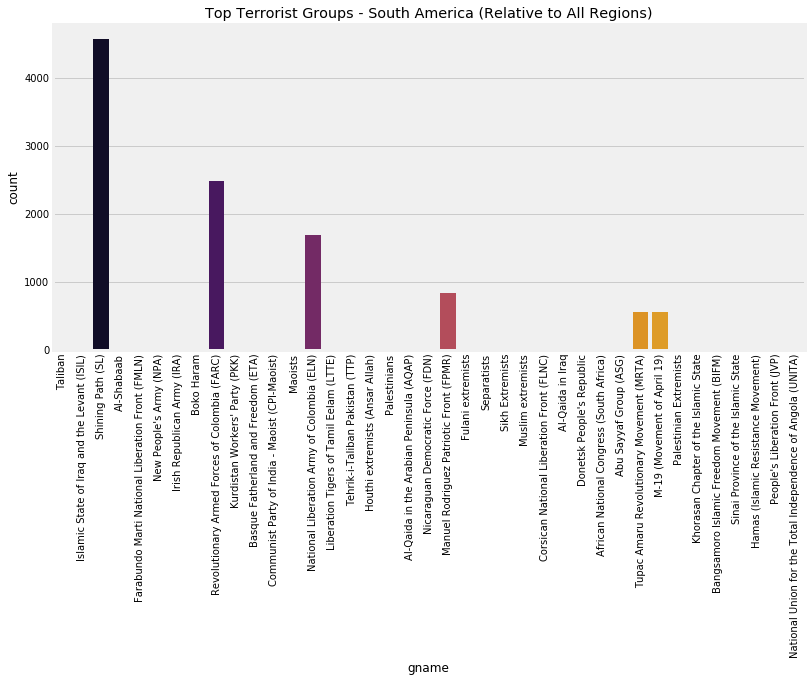

In [76]:
# GRAPH: Top Terrorist Groups for South America Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [77]:
# ===================== Top Terrorist Groups for Western Europe Region ===================== 

regionString = 'Western Europe'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - Western Europe


,incident_count
gname,
Unknown,5177
Irish Republican Army (IRA),2666
Basque Fatherland and Freedom (ETA),2022
Corsican National Liberation Front (FLNC),639
Protestant extremists,334
Ulster Volunteer Force (UVF),270
Ulster Freedom Fighters (UFF),260
Neo-Nazi extremists,219
Red Brigades,217


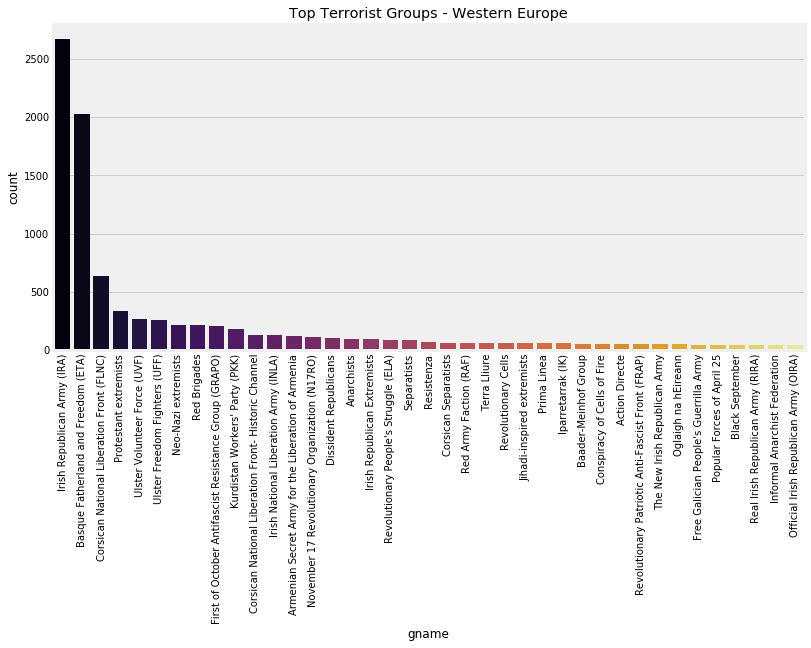

In [78]:
# GRAPH: Top Terrorist Groups for Western Europe Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

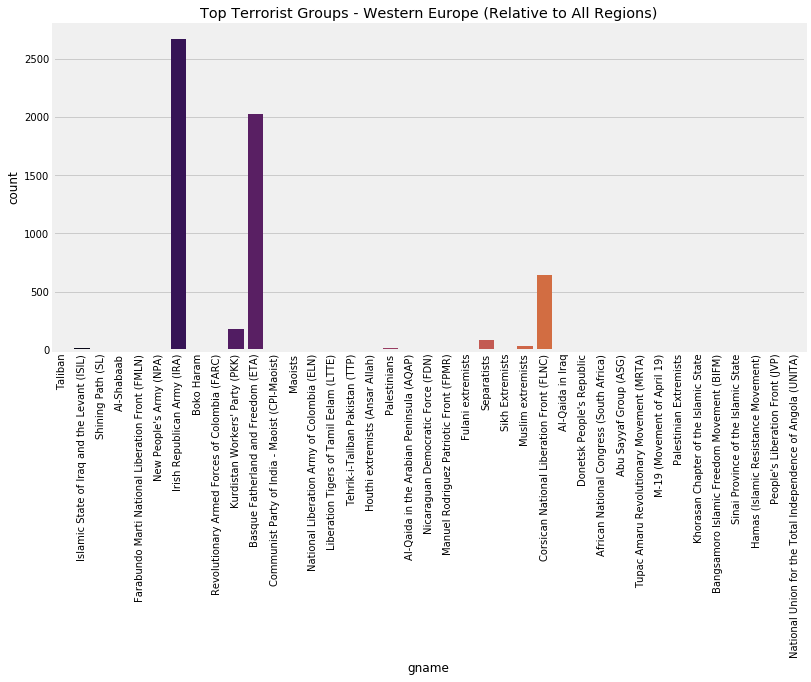

In [79]:
# GRAPH: Top Terrorist Groups for Western Europe Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [80]:
# ===================== Top Terrorist Groups for Southeast Asia Region ===================== 

regionString = 'Southeast Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - Southeast Asia


,incident_count
gname,
Unknown,6352
New People's Army (NPA),3052
Abu Sayyaf Group (ASG),557
Bangsamoro Islamic Freedom Movement (BIFM),477
Separatists,368
Moro Islamic Liberation Front (MILF),367
Moro National Liberation Front (MNLF),197
Khmer Rouge,160
Runda Kumpulan Kecil (RKK),152


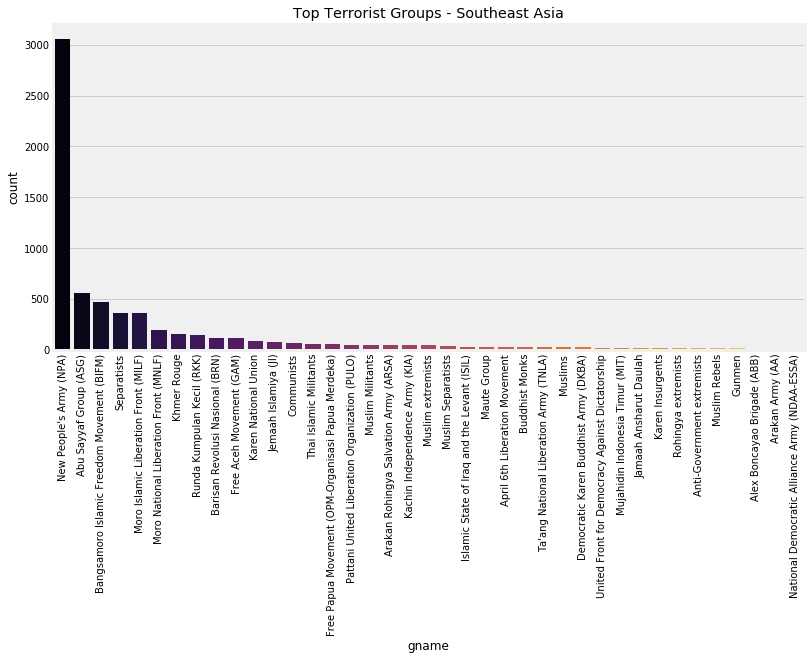

In [81]:
# GRAPH: Top Terrorist Groups for Southeast Asia Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

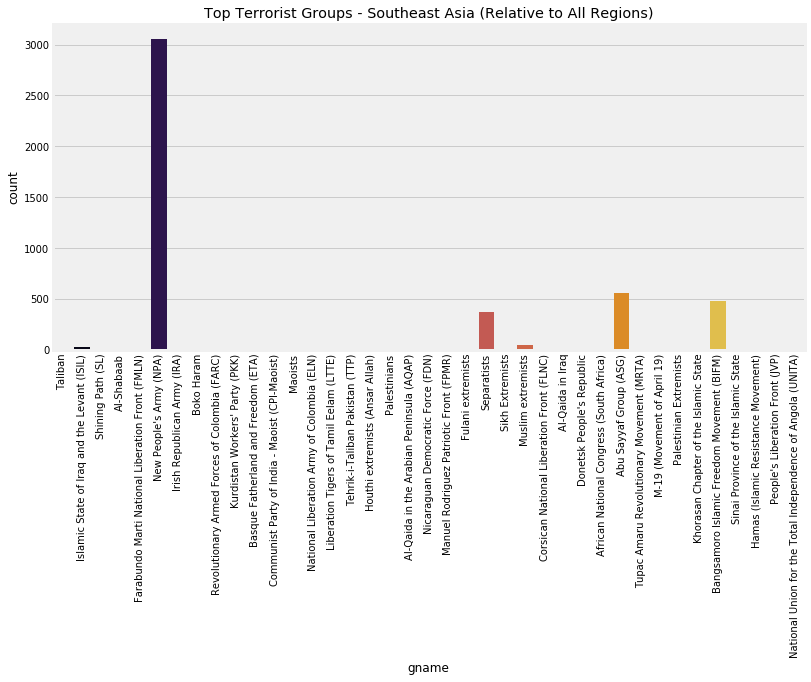

In [84]:
# GRAPH: Top Terrorist Groups for Southeast Asia Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [85]:
# ===================== Top Terrorist Groups for Central America & Caribbean Region ===================== 

regionString = 'Central America & Caribbean'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - Central America & Caribbean


,incident_count
gname,
Unknown,3695
Farabundo Marti National Liberation Front (FMLN),3351
Nicaraguan Democratic Force (FDN),894
Nicaraguan Resistance,231
Sandinista National Liberation Front (FSLN),209
People's Liberation Forces (FPL),167
Guerrilla Army of the Poor (EGP),155
Democratic Revolutionary Alliance (ARDE),140
Guatemalan National Revolutionary Unity (URNG),131


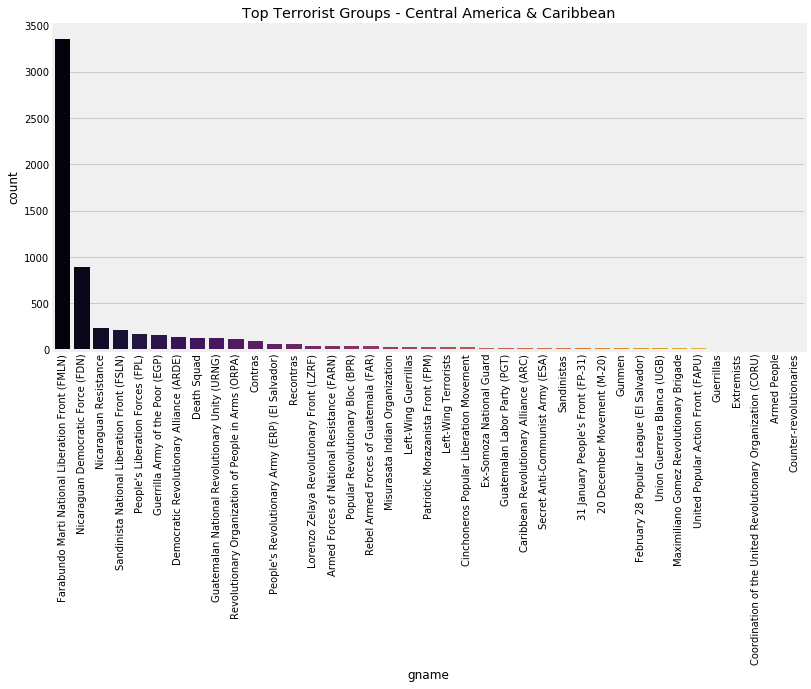

In [86]:
# GRAPH: Top Terrorist Groups for Central America & Caribbean Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

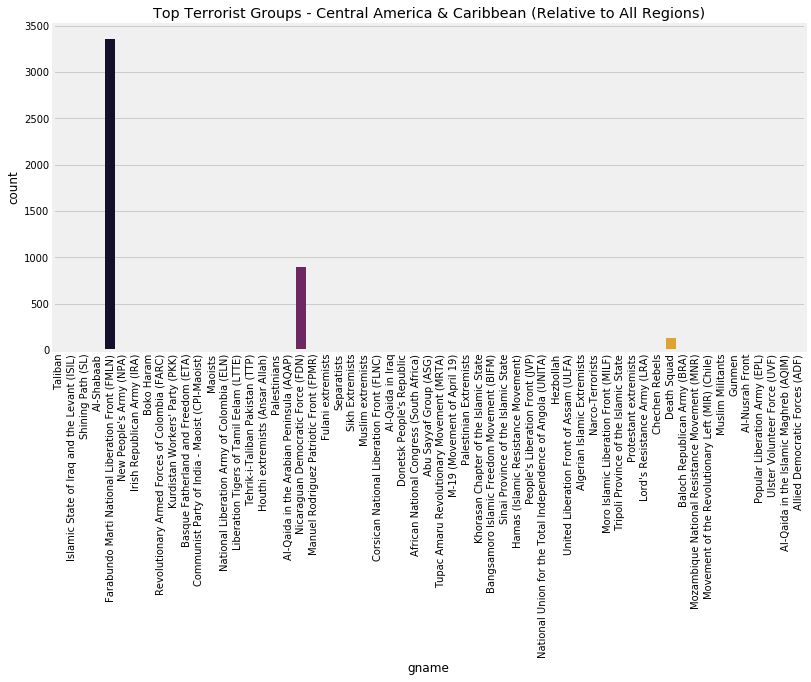

In [91]:
# GRAPH: Top Terrorist Groups for Central America & Caribbean Region
# Includes: Top 60 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:60].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [92]:
# ===================== Top Terrorist Groups for Eastern Europe Region ===================== 

regionString = 'Eastern Europe'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - Eastern Europe


,incident_count
gname,
Unknown,3464
Donetsk People's Republic,625
Chechen Rebels,322
Luhansk People's Republic,209
Kosovo Liberation Army (KLA),58
Albanian extremists,47
Caucasus Emirate,44
National Liberation Army (NLA) (Macedonia),35
Caucasus Province of the Islamic State,25


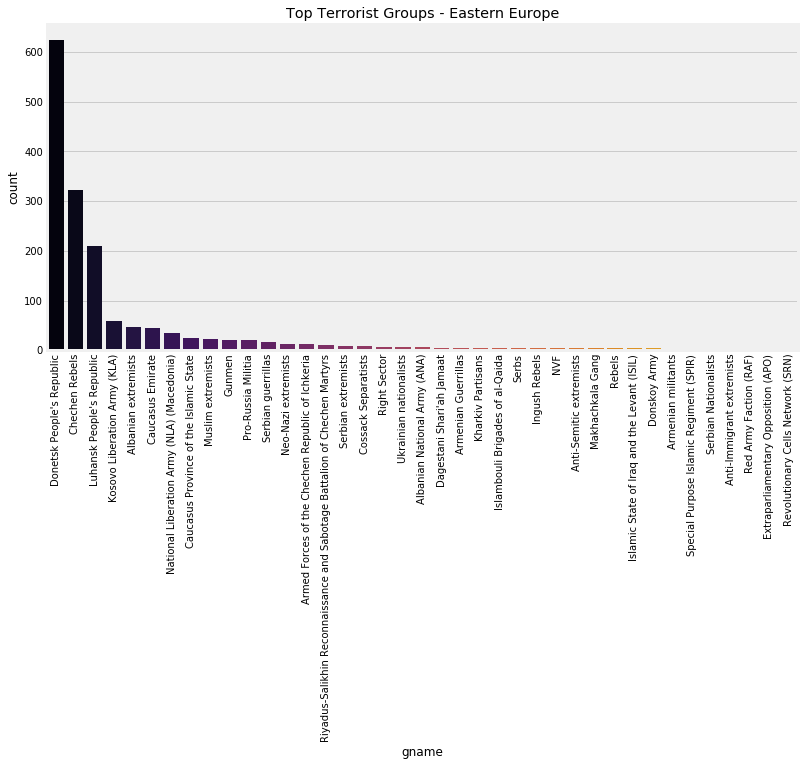

In [93]:
# GRAPH: Top Terrorist Groups for Eastern Europe Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

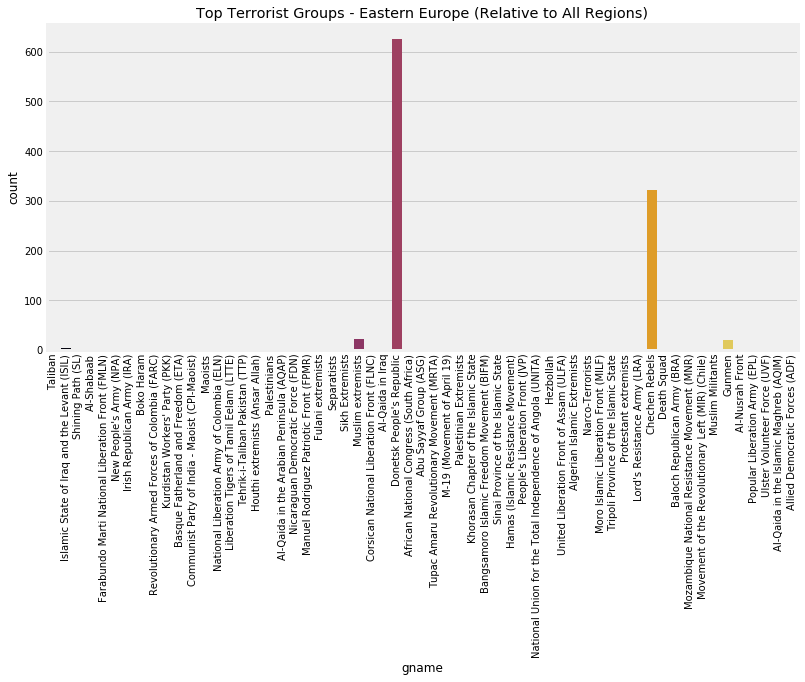

In [94]:
# GRAPH: Top Terrorist Groups for Eastern Europe Region
# Includes: Top 60 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:60].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [95]:
# ===================== Top Terrorist Groups for North America Region ===================== 

regionString = 'North America'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - North America


,incident_count
gname,
Unknown,930
Anti-Abortion extremists,232
Left-Wing Militants,169
Fuerzas Armadas de Liberacion Nacional (FALN),120
White supremacists/nationalists,106
New World Liberation Front (NWLF),86
Black Nationalists,83
Animal Liberation Front (ALF),81
Jewish Defense League (JDL),74


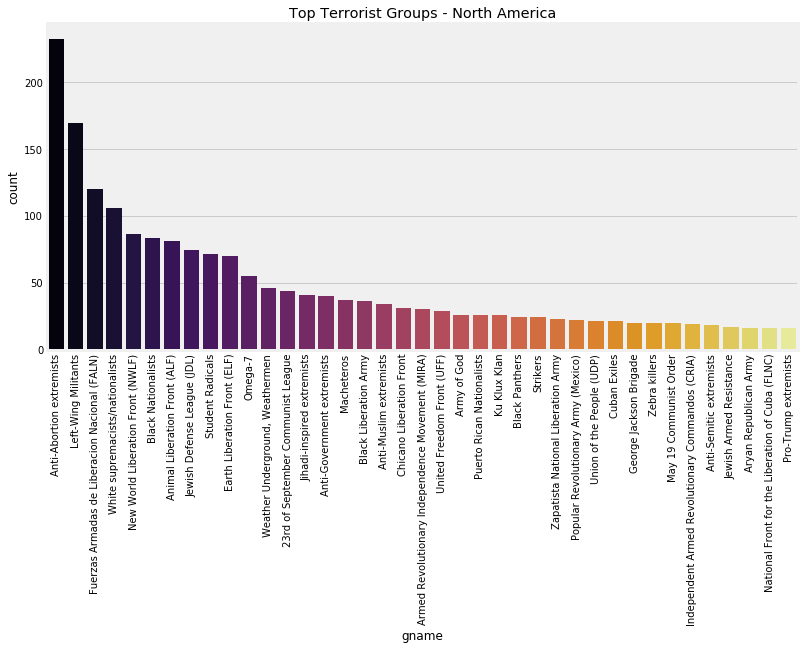

In [96]:
# GRAPH: Top Terrorist Groups for North America Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

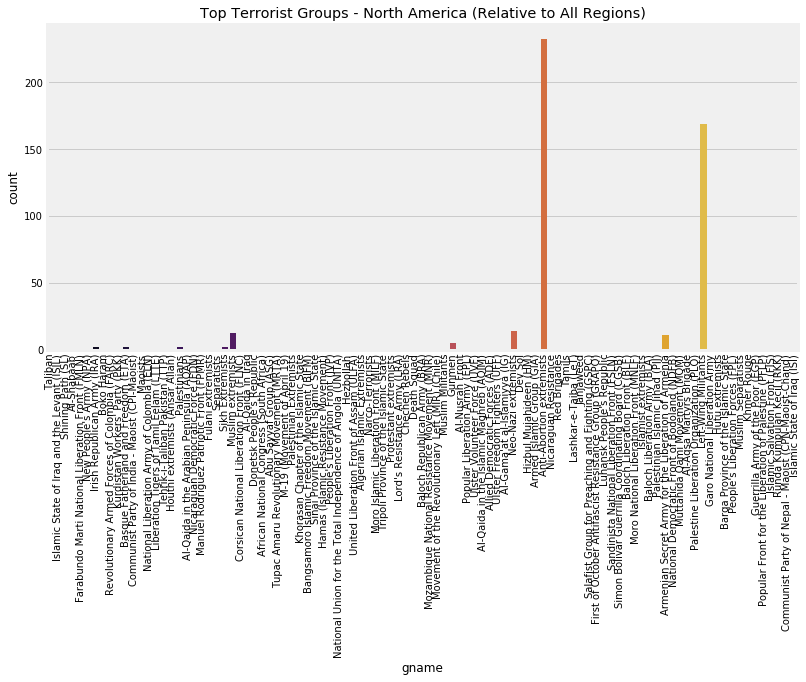

In [99]:
# GRAPH: Top Terrorist Groups for North America Region
# Includes: Top 100 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:100].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [100]:
# ===================== Top Terrorist Groups for East Asia Region ===================== 

regionString = 'East Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - East Asia


,incident_count
gname,
Unknown,472
Uighur Separatists,86
Chukakuha (Middle Core Faction),61
Revolutionary Workers' Council (Kakurokyo),25
East Asia Anti Japanese Armed Front,12
Anti-Nuclear extremists,9
"Senki (""Battle Flag"")",8
Aum Shinri Kyo,8
Turkestan Islamic Party,6


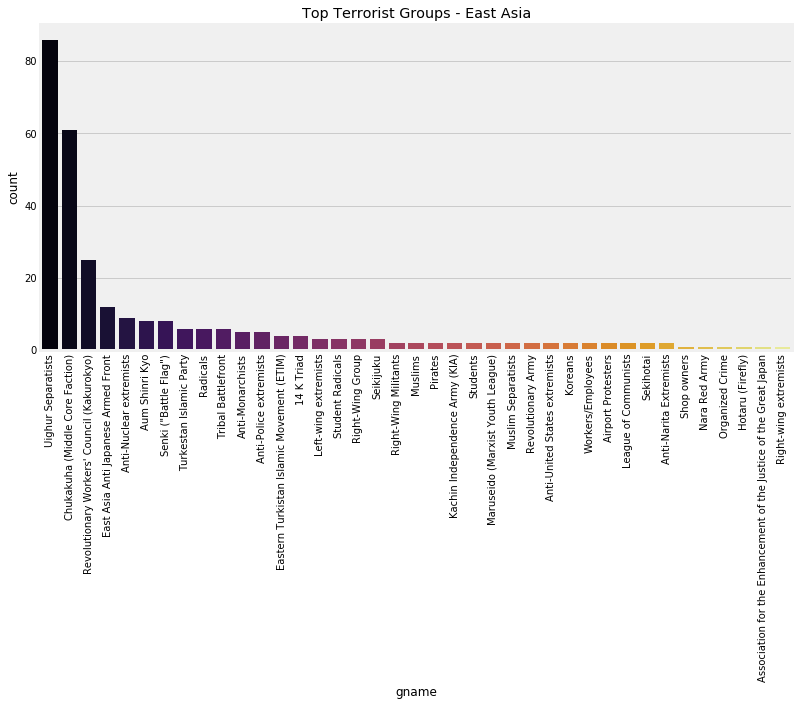

In [101]:
# GRAPH: Top Terrorist Groups for East Asia Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

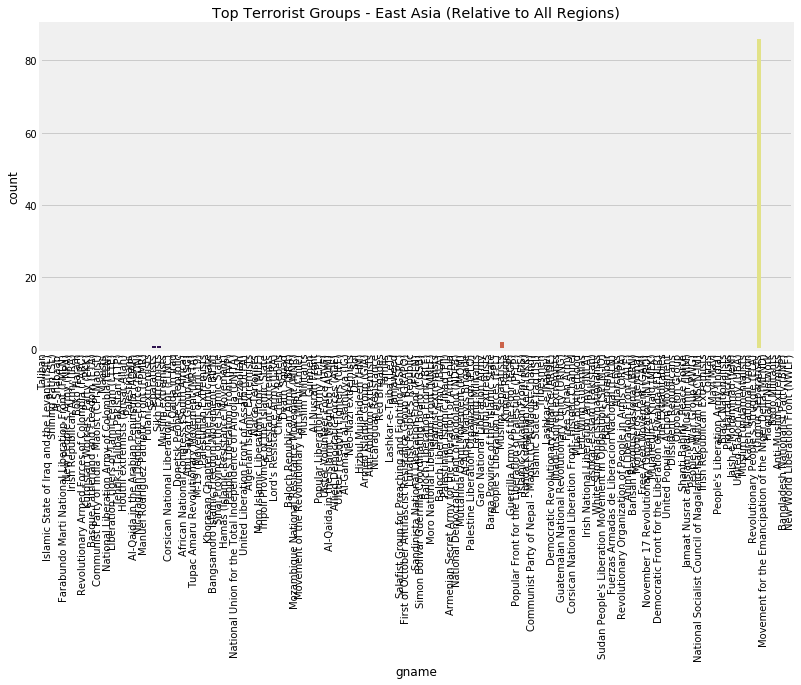

In [107]:
# GRAPH: Top Terrorist Groups for East Asia Region
# Includes: Top 150 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:150].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [108]:
# ===================== Top Terrorist Groups for Central Asia Region ===================== 

regionString = 'Central Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - Central Asia


,incident_count
gname,
Unknown,448
South Ossetian Separatists,10
Supporters of Ex-President Gamsakhurdial,10
Azerbaijan Guerrillas,7
Gunmen,6
Abkhazian Separatists,5
Muslim extremists,5
Jihadi-inspired extremists,5
Georgian extremists,4


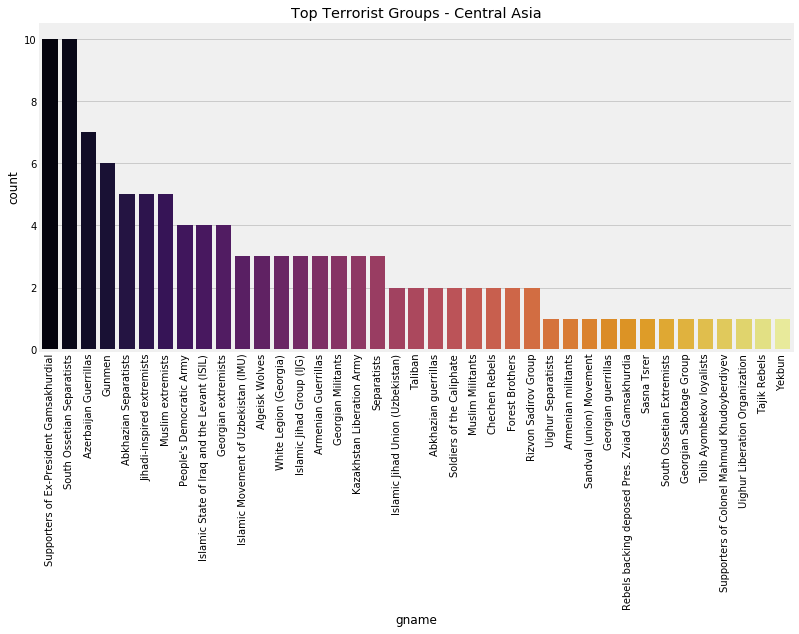

In [109]:
# GRAPH: Top Terrorist Groups for Central Asia Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

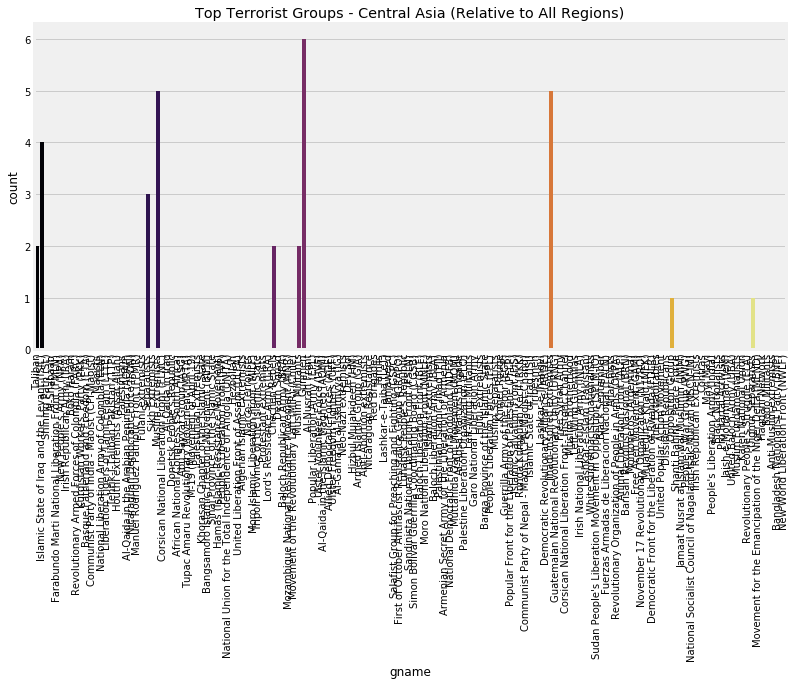

In [112]:
# GRAPH: Top Terrorist Groups for Central Asia Region
# Includes: Top 50 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:150].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()

In [113]:
# ===================== Top Terrorist Groups for Australasia & Oceania Region ===================== 

regionString = 'Australasia & Oceania'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('Top Terrorist Groups - ' + regionString)
target


Top Terrorist Groups - Australasia & Oceania


,incident_count
gname,
Unknown,196
Bougainville Revolutionary Army (BRA),28
Jihadi-inspired extremists,10
Kanak Socialist National Liberation Front,5
Black September,5
Kanak Separatists,4
September 11,4
Anti-Nuclear extremists,4
Informal Anarchist Federation,3


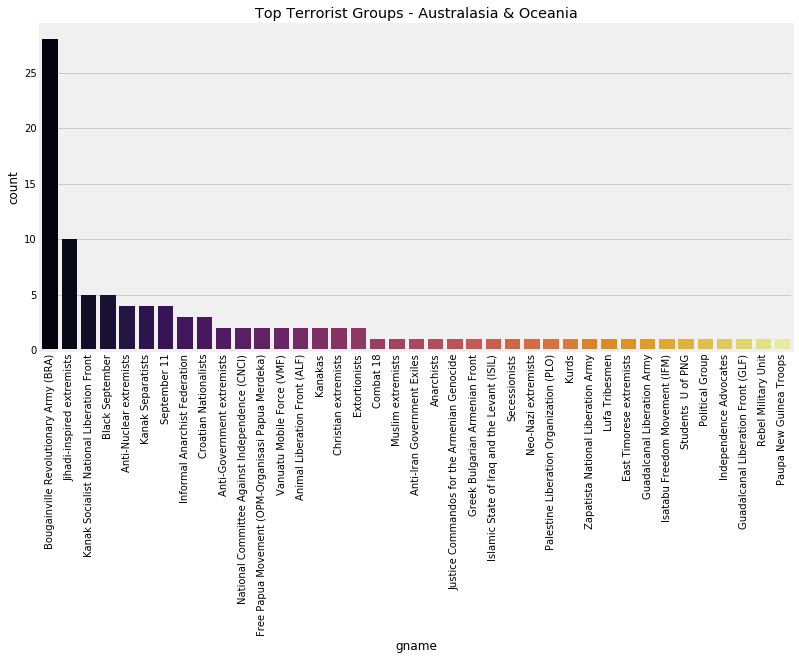

In [114]:
# GRAPH: Top Terrorist Groups for Australasia & Oceania Region
# Includes: Top 40 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=filteredDf['gname'].value_counts().iloc[1:40].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString)
plt.show()

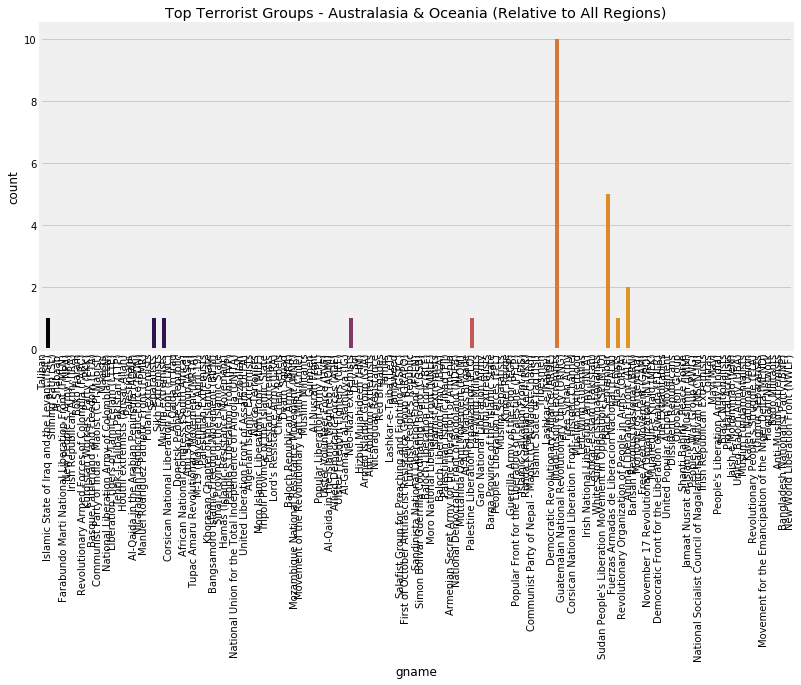

In [115]:
# GRAPH: Top Terrorist Groups for Australasia & Oceania Region
# Includes: Top 50 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=filteredDf, palette ='inferno', order=df['gname'].value_counts().iloc[1:150].index)
plt.xticks(rotation=90)
plt.title('Top Terrorist Groups - ' + regionString + ' (Relative to All Regions)')
plt.show()